<a href="https://colab.research.google.com/github/EnochAy/python-projects/blob/master/zalando_task_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Review-Sentiment Analysis-EDA



Questions
1. What are the characteristics of a good/helpful review?
2. What is the review behavior among different categories? (optional depending on which data you used, some subsets do not contain different product categories)
3. How would you characterize the relationship between good reviews and increased revenues for Amazon? (can be answered theoretically, without data insights from data analysis)
4. Which group of reviewers is more valuable to the business?
5. Any ideas in order to improve the reviews on Amazon?


Helpful count ((Number of Reviews that are helpful Vs. Helpful Vote (Reviews Recommended or do recommend)
Asin: ID of the product

In [ ]:
#Import Necessary Libraries
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

import seaborn as sns
# Visualizations
import missingno
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline


# Datetime
from datetime import datetime
# text preprocessing
import spacy
import re

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_json("C:/Users/USER/OneDrive/Desktop/Interviews/Zalando-Analyst CLV Measurement-wdm position/case_amazon.json")

ValueError: Expected object or value

Dataset was obtained from: http://jmcauley.ucsd.edu/data/amazon/links.html

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ACNGUPJ3A3TM9,0000013714,GCM,"[0, 0]",We use this type of hymnal at church. I was l...,4,Nice Hymnal,1386028800,"12 3, 2013"
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,"[2, 3]",I bought this for my husband who plays the pia...,5,Heavenly Highway Hymns,1252800000,"09 13, 2009"
2,APOZ15IEYQRRR,0000013714,maewest64,"[0, 0]",This is a large size hymn book which is great ...,5,Awesome Hymn Book,1362787200,"03 9, 2013"
3,AYEDW3BFK53XK,0000013714,Missb,"[0, 0]",We use this hymn book at the mission. It has ...,5,Hand Clapping Toe Tapping Oldies,1325462400,"01 2, 2012"
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""","[0, 0]","One review advised this book was large print, ...",3,Misleading,1376092800,"08 10, 2013"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475340 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      475340 non-null  object
 1   asin            475340 non-null  object
 2   reviewerName    475340 non-null  object
 3   helpful         475340 non-null  object
 4   reviewText      475340 non-null  object
 5   OverallRating   475340 non-null  int64 
 6   summary         475340 non-null  object
 7   unixReviewTime  475340 non-null  int64 
 8   reviewTime      475340 non-null  object
 9   review_text     475340 non-null  object
dtypes: int64(2), object(8)
memory usage: 56.0+ MB


In [ ]:
# change column name from overall to OverallRating to make it more descriptive. 
df = df.rename(columns={'overall': 'OverallRating'})

print ("All data:", str(df.shape))
df.head()

All data: (500000, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,OverallRating,summary,unixReviewTime,reviewTime
0,ACNGUPJ3A3TM9,0000013714,GCM,"[0, 0]",We use this type of hymnal at church. I was l...,4,Nice Hymnal,1386028800,"12 3, 2013"
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,"[2, 3]",I bought this for my husband who plays the pia...,5,Heavenly Highway Hymns,1252800000,"09 13, 2009"
2,APOZ15IEYQRRR,0000013714,maewest64,"[0, 0]",This is a large size hymn book which is great ...,5,Awesome Hymn Book,1362787200,"03 9, 2013"
3,AYEDW3BFK53XK,0000013714,Missb,"[0, 0]",We use this hymn book at the mission. It has ...,5,Hand Clapping Toe Tapping Oldies,1325462400,"01 2, 2012"
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""","[0, 0]","One review advised this book was large print, ...",3,Misleading,1376092800,"08 10, 2013"


In [ ]:
df.isnull().sum()

reviewerID            0
asin                  0
reviewerName      24660
helpful               0
reviewText            0
OverallRating         0
summary               0
unixReviewTime        0
reviewTime            0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
OverallRating     0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,OverallRating,summary,unixReviewTime,reviewTime
0,ACNGUPJ3A3TM9,0000013714,GCM,"[0, 0]",We use this type of hymnal at church. I was l...,4,Nice Hymnal,1386028800,"12 3, 2013"
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,"[2, 3]",I bought this for my husband who plays the pia...,5,Heavenly Highway Hymns,1252800000,"09 13, 2009"
2,APOZ15IEYQRRR,0000013714,maewest64,"[0, 0]",This is a large size hymn book which is great ...,5,Awesome Hymn Book,1362787200,"03 9, 2013"
3,AYEDW3BFK53XK,0000013714,Missb,"[0, 0]",We use this hymn book at the mission. It has ...,5,Hand Clapping Toe Tapping Oldies,1325462400,"01 2, 2012"
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""","[0, 0]","One review advised this book was large print, ...",3,Misleading,1376092800,"08 10, 2013"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475340 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      475340 non-null  object
 1   asin            475340 non-null  object
 2   reviewerName    475340 non-null  object
 3   helpful         475340 non-null  object
 4   reviewText      475340 non-null  object
 5   OverallRating   475340 non-null  int64 
 6   summary         475340 non-null  object
 7   unixReviewTime  475340 non-null  int64 
 8   reviewTime      475340 non-null  object
dtypes: int64(2), object(7)
memory usage: 36.3+ MB


In [ ]:
df.to_csv("C:/Users/USER/OneDrive/Desktop/Interviews/Zalando-Analyst CLV Measurement-wdm position/case_amazon.csv", sep=',', encoding='utf-8', index = False)

In [ ]:
"""
concatenate summary and reviewText columns and rename it review_text
Then, drop the redundant columns, summary and reviewText. 
Finally, print out the first five rows.
"""

df['review_text'] = df[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
df1 = df.drop(['reviewText', 'summary'], axis = 1)
df1.head()

,reviewerID,asin,reviewerName,helpful,OverallRating,unixReviewTime,reviewTime,review_text
0,ACNGUPJ3A3TM9,0000013714,GCM,"[0, 0]",4,1386028800,"12 3, 2013",Nice Hymnal We use this type of hymnal at chur...
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,"[2, 3]",5,1252800000,"09 13, 2009",Heavenly Highway Hymns I bought this for my hu...
2,APOZ15IEYQRRR,0000013714,maewest64,"[0, 0]",5,1362787200,"03 9, 2013",Awesome Hymn Book This is a large size hymn bo...
3,AYEDW3BFK53XK,0000013714,Missb,"[0, 0]",5,1325462400,"01 2, 2012",Hand Clapping Toe Tapping Oldies We use this h...
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""","[0, 0]",3,1376092800,"08 10, 2013",Misleading One review advised this book was la...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475340 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      475340 non-null  object
 1   asin            475340 non-null  object
 2   reviewerName    475340 non-null  object
 3   helpful         475340 non-null  object
 4   OverallRating   475340 non-null  int64 
 5   unixReviewTime  475340 non-null  int64 
 6   reviewTime      475340 non-null  object
 7   review_text     475340 non-null  object
dtypes: int64(2), object(6)
memory usage: 32.6+ MB


In [ ]:
df1['review_text']

0         Nice Hymnal We use this type of hymnal at chur...
1         Heavenly Highway Hymns I bought this for my hu...
2         Awesome Hymn Book This is a large size hymn bo...
3         Hand Clapping Toe Tapping Oldies We use this h...
4         Misleading One review advised this book was la...
                                ...                        
499995    The Vampire Diaries this book isn't the best o...
499996    Loved it! I loved reading the back story of tw...
499997    A great read for the show fans This book has b...
499998    A Pathetic Attempt at Keeping TVD Alive! First...
499999    understanding stephan all vampire diaries book...
Name: review_text, Length: 475008, dtype: object

In [ ]:
## Split 'helpful' column into 'negative_feedback' and 'positive_feedback' and drop it at the end

list_positive = []
list_negative = []

for help in df1['helpful']:
    list_positive.append(help[0])
    list_negative.append(help[1] - help[0])
    
# Positive Feedback (Supporting reviewer's idea and find it useful)
df1['positive_feedback'] = list_positive

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
df1['negative_feedback'] = list_negative

# Drop redundant 'helpful' column
df1 = df1.drop('helpful', axis = 1)
df1.head()

,reviewerID,asin,reviewerName,OverallRating,unixReviewTime,reviewTime,review_text,positive_feedback,negative_feedback
0,ACNGUPJ3A3TM9,0000013714,GCM,4,1386028800,"12 3, 2013",Nice Hymnal We use this type of hymnal at chur...,0,0
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,5,1252800000,"09 13, 2009",Heavenly Highway Hymns I bought this for my hu...,2,1
2,APOZ15IEYQRRR,0000013714,maewest64,5,1362787200,"03 9, 2013",Awesome Hymn Book This is a large size hymn bo...,0,0
3,AYEDW3BFK53XK,0000013714,Missb,5,1325462400,"01 2, 2012",Hand Clapping Toe Tapping Oldies We use this h...,0,0
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""",3,1376092800,"08 10, 2013",Misleading One review advised this book was la...,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475340 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   reviewerID         475340 non-null  object
 1   asin               475340 non-null  object
 2   reviewerName       475340 non-null  object
 3   OverallRating      475340 non-null  int64 
 4   unixReviewTime     475340 non-null  int64 
 5   reviewTime         475340 non-null  object
 6   review_text        475340 non-null  object
 7   positive_feedback  475340 non-null  int64 
 8   negative_feedback  475340 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 52.4+ MB


In [ ]:
## Classify ratings as good

good_rate = len(df1[df1['OverallRating'] >= 3])
bad_rate = len(df1[df1['OverallRating'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for products'.format(good_rate))
print ('Bad ratings : {} reviews for products'.format(bad_rate))

Good ratings : 426999 reviews for products
Bad ratings : 48341 reviews for products


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475340 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   reviewerID         475340 non-null  object
 1   asin               475340 non-null  object
 2   reviewerName       475340 non-null  object
 3   OverallRating      475340 non-null  int64 
 4   unixReviewTime     475340 non-null  int64 
 5   reviewTime         475340 non-null  object
 6   review_text        475340 non-null  object
 7   positive_feedback  475340 non-null  int64 
 8   negative_feedback  475340 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 52.4+ MB


In [ ]:
# Apply the new classification to the ratings column
df1['rating_class'] = df1['OverallRating'].apply(lambda x: 'bad' if x < 3 else'good')
df1.head()

,reviewerID,asin,reviewerName,OverallRating,unixReviewTime,reviewTime,review_text,positive_feedback,negative_feedback,rating_class
0,ACNGUPJ3A3TM9,0000013714,GCM,4,1386028800,"12 3, 2013",Nice Hymnal We use this type of hymnal at chur...,0,0,good
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,5,1252800000,"09 13, 2009",Heavenly Highway Hymns I bought this for my hu...,2,1,good
2,APOZ15IEYQRRR,0000013714,maewest64,5,1362787200,"03 9, 2013",Awesome Hymn Book This is a large size hymn bo...,0,0,good
3,AYEDW3BFK53XK,0000013714,Missb,5,1325462400,"01 2, 2012",Hand Clapping Toe Tapping Oldies We use this h...,0,0,good
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""",3,1376092800,"08 10, 2013",Misleading One review advised this book was la...,0,0,good


In [ ]:
# Apply the helpfullness ratio
df1['helpful_ratio'] = df1.positive_feedback.div((df1.positive_feedback + df1.negative_feedback), axis=0)

# Drop redundant 'help_prop' column
df1 = df1.drop('help_prop', axis = 1)
df1

,reviewerID,asin,reviewerName,OverallRating,unixReviewTime,reviewTime,review_text,positive_feedback,negative_feedback,rating_class,helpful_ratio
0,ACNGUPJ3A3TM9,0000013714,GCM,4,1386028800,"12 3, 2013",Nice Hymnal We use this type of hymnal at chur...,0,0,good,NaN
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,5,1252800000,"09 13, 2009",Heavenly Highway Hymns I bought this for my hu...,2,1,good,0.666667
2,APOZ15IEYQRRR,0000013714,maewest64,5,1362787200,"03 9, 2013",Awesome Hymn Book This is a large size hymn bo...,0,0,good,NaN
3,AYEDW3BFK53XK,0000013714,Missb,5,1325462400,"01 2, 2012",Hand Clapping Toe Tapping Oldies We use this h...,0,0,good,NaN
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""",3,1376092800,"08 10, 2013",Misleading One review advised this book was la...,0,0,good,NaN
...,...,...,...,...,...,...,...,...,...,...,...
499995,A3AL0YEC7YZR4T,0062003933,Giddyupgirl,4,1358121600,"01 14, 2013",The Vampire Diaries this book isn't the best o...,0,0,good,NaN
499996,A1ZT32FR0JNS2I,0062003933,"Hailey Barger ""icequeen1215""",5,1316649600,"09 22, 2011",Loved it! I loved reading the back story of tw...,0,0,good,NaN
499997,A2LYIUSZX6Q13H,0062003933,"HugeWishlist ""Natalia""",5,1319587200,"10 26, 2011",A great read for the show fans This book has b...,0,0,good,NaN
499998,A3RHZLVHWLM871,0062003933,Jeannie Blue,1,1293494400,"12 28, 2010",A Pathetic Attempt at Keeping TVD Alive! First...,3,3,bad,0.500000


In [ ]:
# filling helpfullness ratio NAN value with zero
df1['helpful_ratio'].fillna(0, inplace=True)

In [ ]:
df1.head()

,reviewerID,asin,reviewerName,OverallRating,unixReviewTime,reviewTime,review_text,positive_feedback,negative_feedback,rating_class,helpful_ratio
0,ACNGUPJ3A3TM9,0000013714,GCM,4,1386028800,"12 3, 2013",Nice Hymnal We use this type of hymnal at chur...,0,0,good,0.000000
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,5,1252800000,"09 13, 2009",Heavenly Highway Hymns I bought this for my hu...,2,1,good,0.666667
2,APOZ15IEYQRRR,0000013714,maewest64,5,1362787200,"03 9, 2013",Awesome Hymn Book This is a large size hymn bo...,0,0,good,0.000000
3,AYEDW3BFK53XK,0000013714,Missb,5,1325462400,"01 2, 2012",Hand Clapping Toe Tapping Oldies We use this h...,0,0,good,0.000000
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""",3,1376092800,"08 10, 2013",Misleading One review advised this book was la...,0,0,good,0.000000


In [ ]:
# checking duplicates based on 'reviewName', 'unixReviewTime', and 'asin', columns
df1[df1.duplicated(['reviewerName','unixReviewTime','asin'], keep= False)]

,reviewerID,asin,reviewerName,OverallRating,unixReviewTime,reviewTime,review_text,positive_feedback,negative_feedback,rating_class,helpful_ratio
859,A1E2JMP7OR2CH1,0002007770,Amazon Customer,5,1306022400,"05 22, 2011","Fantastic, has a little bit of everything This...",0,0,good,0.000000
861,AETOZSMHO7H5D,0002007770,Amazon Customer,4,1304121600,"04 30, 2011",Liked the audio-book version This story helped...,0,0,good,0.000000
865,A331LHNKUWL3B,0002007770,Amazon Customer,5,1306022400,"05 22, 2011",Run Away to the Circus of Post Depression Amer...,0,0,good,0.000000
881,A2942MV1XI338B,0002007770,Amazon Customer,4,1304121600,"04 30, 2011",Great Story - Not for Animal Lovers Having rea...,1,0,good,1.000000
885,A2HFW5JXDVCNG3,0002007770,Amazon Customer,4,1361836800,"02 26, 2013",A good read I found this book easy to read and...,1,0,good,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
492998,A2GK67Q4RFWJEB,0061996203,Amazon Customer,3,1359676800,"02 1, 2013",Disappointed!!! I was so very disappointed in ...,1,2,good,0.333333
493701,A38LSNKIMTTVQI,0061997102,Amazon Customer,5,1390348800,"01 22, 2014","Just read it. Before I bought this, I noticed ...",0,0,good,0.000000
493708,A34UJ751QV38Y2,0061997102,Amazon Customer,5,1391472000,"02 4, 2014",Wonderful!!!! This book made me laugh and cry....,0,0,good,0.000000
493710,AC8UY7L0IZVMA,0061997102,Amazon Customer,5,1390348800,"01 22, 2014","Heart full of love This was a lovely, unexpect...",0,0,good,0.000000


In [ ]:
df1.shape

(475340, 11)

In [ ]:
# Drop duplicates in 'reviewName' and 'unixReviewTime' columns
df1 = df1.drop_duplicates(['asin','reviewerName', 'unixReviewTime'], keep = 'first')

In [ ]:
df1.shape

(475008, 11)

In [ ]:
# Convert time object to datetime and create a new column named 'time'
df1['time'] = df1.reviewTime.str.replace(',', "")
df1['time'] = pd.to_datetime(df1['time'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
df1 = df1.drop('reviewTime', axis = 1)
df1.head()

,reviewerID,asin,reviewerName,OverallRating,unixReviewTime,review_text,positive_feedback,negative_feedback,rating_class,helpful_ratio,time
0,ACNGUPJ3A3TM9,0000013714,GCM,4,1386028800,Nice Hymnal We use this type of hymnal at chur...,0,0,good,0.000000,2013-12-03
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,5,1252800000,Heavenly Highway Hymns I bought this for my hu...,2,1,good,0.666667,2009-09-13
2,APOZ15IEYQRRR,0000013714,maewest64,5,1362787200,Awesome Hymn Book This is a large size hymn bo...,0,0,good,0.000000,2013-03-09
3,AYEDW3BFK53XK,0000013714,Missb,5,1325462400,Hand Clapping Toe Tapping Oldies We use this h...,0,0,good,0.000000,2012-01-02
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""",3,1376092800,Misleading One review advised this book was la...,0,0,good,0.000000,2013-08-10


In [ ]:
df1.columns

Index(['reviewerID', 'asin', 'reviewerName', 'OverallRating', 'unixReviewTime',
       'review_text', 'positive_feedback', 'negative_feedback', 'rating_class',
       'helpful_ratio', 'time'],
      dtype='object')

In [ ]:
# Rename the columns
df1.columns = ['reviewer_id', 'asin', 'reviewerName', 'overall_rating', 'unix_review_time', 'review_text','positive_feedback','negative_feedback','rating_class','helpful_ratio','time']

# Sample observation
df1.head()

,reviewer_id,asin,reviewerName,overall_rating,unix_review_time,review_text,positive_feedback,negative_feedback,rating_class,helpful_ratio,time
0,ACNGUPJ3A3TM9,0000013714,GCM,4,1386028800,Nice Hymnal We use this type of hymnal at chur...,0,0,good,0.000000,2013-12-03
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,5,1252800000,Heavenly Highway Hymns I bought this for my hu...,2,1,good,0.666667,2009-09-13
2,APOZ15IEYQRRR,0000013714,maewest64,5,1362787200,Awesome Hymn Book This is a large size hymn bo...,0,0,good,0.000000,2013-03-09
3,AYEDW3BFK53XK,0000013714,Missb,5,1325462400,Hand Clapping Toe Tapping Oldies We use this h...,0,0,good,0.000000,2012-01-02
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""",3,1376092800,Misleading One review advised this book was la...,0,0,good,0.000000,2013-08-10


In [ ]:
## DESCRIPTIVE STATISTICS
print ("================================================")

### Total reviews
total = len(df1)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(df1.reviewer_id.unique()))
reviewer_prop = float(len(df1.reviewer_id.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()


### How many unique products?
print ("Number of unique reviews: ", len(df1.reviewer_id.unique()))
review_prop = float(len(df1.reviewer_id.unique())/total)
print ("Prop of unique reviews: ",round(review_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(df1.overall_rating.mean(),3))

### Average helpful ratio
print ("Average helpfull ratio score: ",round(df1.helpful_ratio.mean(),3))


print ("================================================")

Number of reviews:  475008

Number of unique reviewers:  270320
Prop of unique reviewers:  0.569

Number of unique reviews:  270320
Prop of unique reviews:  0.569

Average rating score:  4.19
Average helpfull ratio score:  0.382


In [ ]:
# Read statistic summary of numeric variables
df1[['overall_rating','positive_feedback','negative_feedback','helpful_ratio']].describe()

,overall_rating,positive_feedback,negative_feedback,helpful_ratio
count,475008.000000,475008.000000,475008.000000,475008.000000
mean,4.190237,3.613977,1.628526,0.381748
std,1.124089,19.984809,7.615462,0.428311
min,1.000000,0.000000,-1.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,1.000000,0.857143
max,5.000000,3229.000000,1112.000000,2.000000


Text(0, 0.5, 'Number of Reviews')

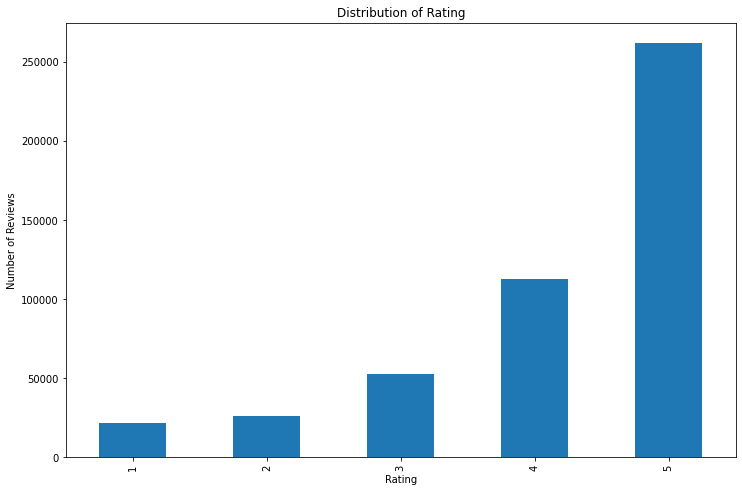

In [ ]:
## PLOT DISTRIBUTION OF RATING 
plt.figure(figsize=(12,8))
df1['overall_rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

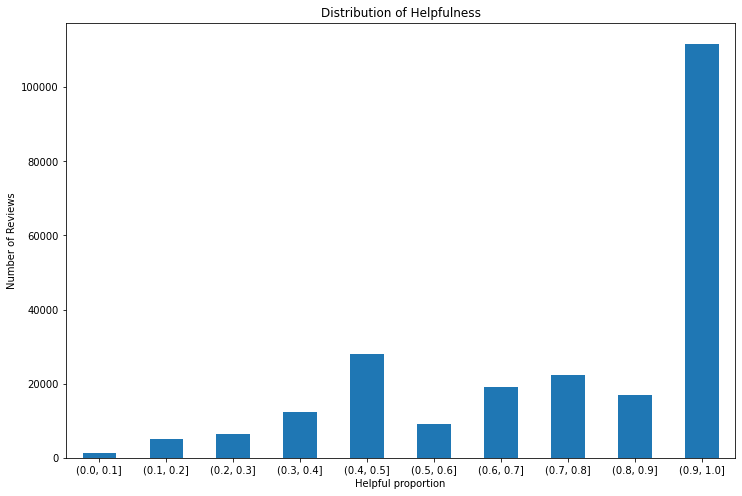

In [ ]:
## DISTRIBUTION OF HELPFULNESS
plt.figure(figsize=(12,8))

cutoff = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


Dist_help = df1.groupby([pd.cut(df1['helpful_ratio'], bins = cutoff)]).size()
Dist_help.plot(kind='bar')

plt.title("Distribution of Helpfulness")
plt.xlabel("Helpful proportion")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

In [ ]:
## DISTRIBUTION OF RATING SCORE
class_counts = df1.groupby('overall_rating').size()
class_counts

overall_rating
1     22028
2     26236
3     52641
4    112542
5    261561
dtype: int64

In [ ]:
# Customer totals for each rating class
df1['rating_class'].value_counts()

good    426744
bad      48264
Name: rating_class, dtype: int64

In [ ]:
# Print the number of positive feedback
positive = len(df1[df1['positive_feedback'] > 0])
print('Number of positive feedbacks: {}'.format(positive))

# Print the number of negative feedback
negative = len(df1[df1['negative_feedback'] > 0])      
print('\nNumber of negative feedbacks: {}'.format(negative))

Number of positive feedbacks: 232588

Number of negative feedbacks: 166292


In [ ]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(df1['reviewer_id'].unique())))
      
"""
Number of unique products
print('\nNumber of unique products : {}'.format(len(df1['product_id'].unique())))
"""

      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(df1)/len(df1['reviewer_id'].unique()))))      

"""
Review number per unique product 
print('\nReview per product: {}'.format((len(df1)/len(df1['product_id'].unique()))))
"""


Number of unique customers : 270320

Review per customer: 1.7572062740455756


"\nReview number per unique product \nprint('\nReview per product: {}'.format((len(df1)/len(df1['product_id'].unique()))))\n"

In [ ]:
df1.columns
df1.head()

,reviewer_id,asin,reviewerName,overall_rating,unix_review_time,review_text,positive_feedback,negative_feedback,rating_class,helpful_ratio,time
0,ACNGUPJ3A3TM9,0000013714,GCM,4,1386028800,Nice Hymnal We use this type of hymnal at chur...,0,0,good,0.000000,2013-12-03
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,5,1252800000,Heavenly Highway Hymns I bought this for my hu...,2,1,good,0.666667,2009-09-13
2,APOZ15IEYQRRR,0000013714,maewest64,5,1362787200,Awesome Hymn Book This is a large size hymn bo...,0,0,good,0.000000,2013-03-09
3,AYEDW3BFK53XK,0000013714,Missb,5,1325462400,Hand Clapping Toe Tapping Oldies We use this h...,0,0,good,0.000000,2012-01-02
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""",3,1376092800,Misleading One review advised this book was la...,0,0,good,0.000000,2013-08-10


# 1. "rating_class" Vs. "Review Length" Features

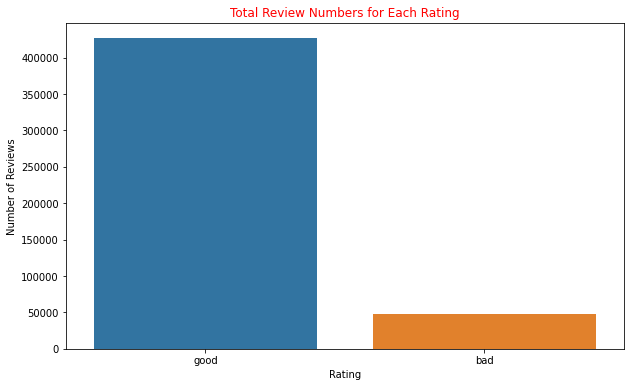

good    426744
bad      48264
Name: rating_class, dtype: int64

In [ ]:
# Total numbers of reviews for classified as Good/Bad Rating
plt.figure(figsize = (10,6))
sns.countplot(df1['rating_class'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df1['rating_class'].value_counts()

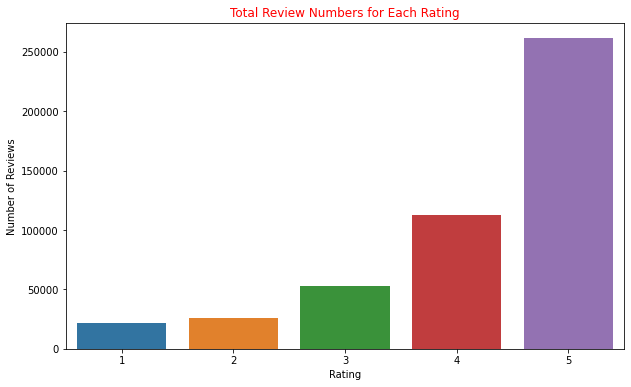

5    261561
4    112542
3     52641
2     26236
1     22028
Name: overall_rating, dtype: int64

In [ ]:
# Total numbers of reviews for each Rating
plt.figure(figsize = (10,6))
sns.countplot(df1['overall_rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df1['overall_rating'].value_counts()

Good reviews have higher length of reviews, while bad reviews have lower length of reviews.

In [ ]:
df1.columns
df1.head()

,reviewer_id,asin,reviewerName,overall_rating,unix_review_time,review_text,positive_feedback,negative_feedback,rating_class,helpful_ratio,time
0,ACNGUPJ3A3TM9,0000013714,GCM,4,1386028800,Nice Hymnal We use this type of hymnal at chur...,0,0,good,0.000000,2013-12-03
1,A2SUAM1J3GNN3B,0000013714,J. McDonald,5,1252800000,Heavenly Highway Hymns I bought this for my hu...,2,1,good,0.666667,2009-09-13
2,APOZ15IEYQRRR,0000013714,maewest64,5,1362787200,Awesome Hymn Book This is a large size hymn bo...,0,0,good,0.000000,2013-03-09
3,AYEDW3BFK53XK,0000013714,Missb,5,1325462400,Hand Clapping Toe Tapping Oldies We use this h...,0,0,good,0.000000,2012-01-02
4,A1KLCGLCXYP1U1,0000013714,"Paul L ""Paul Lytle""",3,1376092800,Misleading One review advised this book was la...,0,0,good,0.000000,2013-08-10


# Question 4:	Which group of reviewers is more valuable to the business?

KeyError: 'overall_rating'

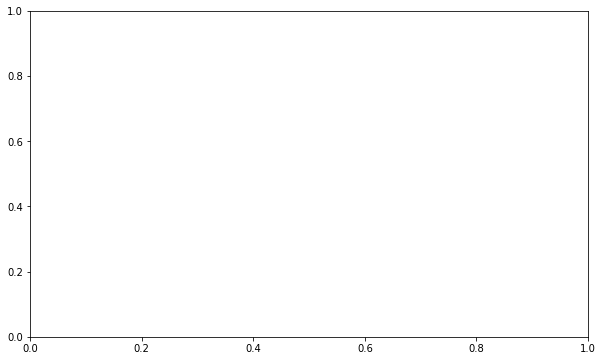

In [ ]:
## DISTRIBUTION OF RATING FOR HELPFULNESS
x=df1['rating_class']
y=df1['helpful_ratio']
#plt.figure(figsize = (10,6))
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('overall_rating')['helpful_ratio'].mean().plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan']) 
#df.plot(x, y, legend=True, color='g', ax=ax)
plt.title("Helpfulness in rating",color='r')
plt.xlabel("Rating")
plt.ylabel("Helpfulness ratio")
plt.ylim([0, 1])
plt.xticks(rotation=0)
plt.show()

# Question 5: Any ideas in order to improve the reviews on Amazon?

<AxesSubplot:>

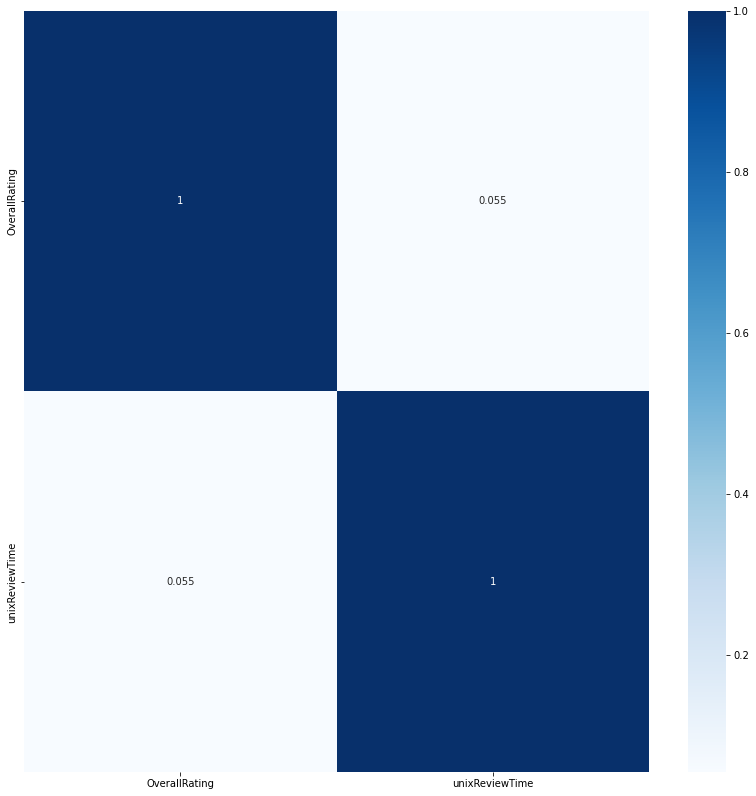

In [ ]:
# Plotting correlation matrix between numeric variables

plt.figure(figsize = (14,14))
sns.heatmap(df.corr(method="pearson"), cmap='Blues', annot = True)

<AxesSubplot:>

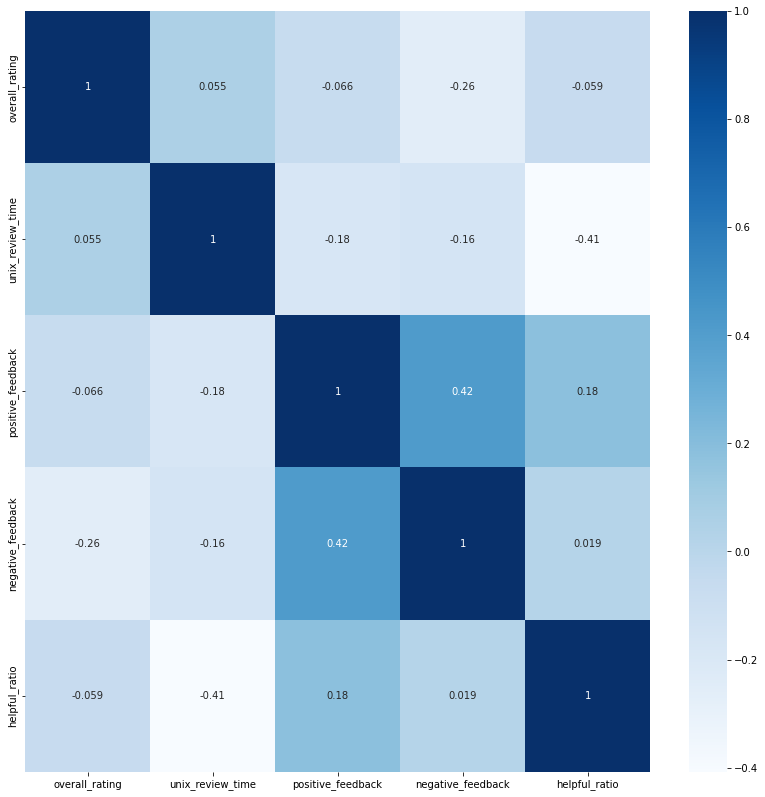

In [ ]:
# Plotting correlation matrix between numeric variables

plt.figure(figsize = (14,14))
sns.heatmap(df1.corr(method="pearson"), cmap='Blues', annot = True)

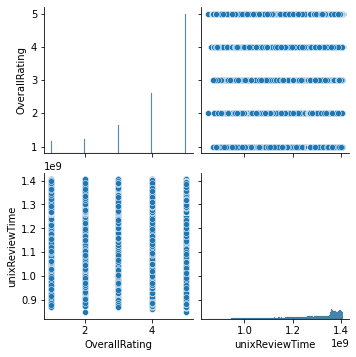

In [ ]:
sns.pairplot(df)

In [ ]:
sns.pairplot(df1)

In [ ]:
"""
df = pd.read_json("C:/Users/USER/OneDrive/Desktop/Interviews/Zalando-Analyst CLV Measurement-wdm position/reviews_Clothing_Shoes_and_Jewelry.json")  #I decided not to use this dataset to safe time.
"""

'\ndf = pd.read_json("C:/Users/USER/OneDrive/Desktop/Interviews/Zalando-Analyst CLV Measurement-wdm position/reviews_Clothing_Shoes_and_Jewelry.json")  #I decided not to use this dataset to safe time.\n'